<h4>Lily Grumbach
    <br>M1 Humanités numériques - Université PSL</h4>
<h1><center>Rendu TAIS-TAL </center></h1>
<h2><center>Partie TAL</center></h2>
<h3><center>1/3 : Exploration des données</center></h3>

<b><u>PLAN:</u></b>
1) **Exploration des données**
<br>2) NER avec Doccano
<br>3) Géoréférencement des localisations extraites

Ce premier notebook nous permet une première approche des articles 

# 0. Initialisation 
#### Importation et re-structuration des données pour leur exploitation dans cette partie

In [20]:
import pandas as pd
import Exploration_Donnees
import matplotlib.pyplot as plt

#Importation des documents de départ pour le passer en format txt 

###AHMC
dfAHMC = pd.read_csv("./Notebook_data/input/AHMC_articles-originaux_Termine2.tsv" ,sep='\t')

df_spacyAHMC = dfAHMC.loc[dfAHMC["revue_annee"]<= 1908] #articles jusqu'à 1908.
df_spacyAHMC = df_spacyAHMC[["article_titre","revue_annee"]]

###AMN
dfAMN=pd.read_csv("./Notebook_data/input/AMN-articles-98-08_clean-main.tsv",sep="\t")
dfAMN=dfAMN[:-2] #les deux derniers rows étaient des nan
df_spacyAMN = dfAMN[["article_titre","revue_annee"]]

#Vérifier que c'est bien passé : 
#df_spacyAMN
#df_spacyAHMC

In [2]:
#Création de fichiers pour exploration:
txtAHMC_list_path = "./Notebook_data/Exploration_Donnees_data/ArticlesEnListe/titres_articles_list_AHMC-to-1908.txt"
txtAMN_list_path = "./Notebook_data/Exploration_Donnees_data/ArticlesEnListe/titres_articles_list_AMN-1898-1908.txt"

#Ici on ne souhaite que conserverdansle directory le fichier sous forme de liste en .txt
from Exploration_Donnees import df_to_txt_list_art
df_to_txt_list_art(df_spacyAHMC,txtAHMC_list_path)
df_to_txt_list_art(df_spacyAMN,txtAMN_list_path)


#Avec une seule entrée pour l'ensemble des textes:
txtAHMC_full_path = "./Notebook_data/Exploration_Donnees_data/ArticlesEnsemble/titres_articles_full_AHMC-to-1908.txt"
txtAMN_full_path = "./Notebook_data/Exploration_Donnees_data/ArticlesEnsemble/titres_articles_full_AMN-1898-1908.txt"

#Ici on effectue deux manipulations : export dans le directory sous forme d'un seul 
#texte et nouvelle variable en sortie des articles sous forme de liste
from Exploration_Donnees import df_to_txt_fullANDlist
list_art_AHMC = df_to_txt_fullANDlist(df_spacyAHMC,txtAHMC_full_path)
list_art_AMN = df_to_txt_fullANDlist(df_spacyAMN,txtAMN_full_path)

In [3]:
#Vérifier que c'est bien passé : 
#list_art_AHMC
#list_art_AMN

In [4]:
print(
    "Nombre d'articles dans les AHMC :",len(list_art_AHMC),
    "\nNombre d'articles dans les AMN : ",len(list_art_AMN))

Nombre d'articles dans les AHMC : 559 
Nombre d'articles dans les AMN :  638


# 1. Création de nouveaux df

#### 1.1. Un df<u> par revue</u> organisé <u>par année</u> : 

In [5]:
dfAHMC_par_annee = df_spacyAHMC.groupby(by="revue_annee").sum()
dfAMN_par_annee = df_spacyAMN.groupby(by="revue_annee").sum()

#Renomer la colonne "article_titre" en "article_annee"
dfAHMC_par_annee = dfAHMC_par_annee.rename(columns={"article_titre":"articles_annee"})
dfAMN_par_annee = dfAMN_par_annee.rename(columns={"article_titre":"articles_annee"})

#### 1.2. Un df <u>pour les deux revues par année</u>

In [6]:
df_comparaison =pd.concat({"AMN":dfAMN_par_annee,"AHMC":dfAHMC_par_annee},axis=1)
df_comparaison

,AMN,AHMC
,articles_annee,articles_annee
revue_annee,,
1898,Rapport médical d'ensemble sur les colonnes du...,Contribution à la géographie médicale. Notes s...
1899,"La lèpre en Nouvelle-Calédonie, par A. AuchéLa...",Rôle du pneumocoque dans la pathologie des ind...
1900,Coup de chaleur et coup de soleil (Étiologie p...,Contribution à la géographie médicale. Notes m...
1901,Influence des climats et des saisons sur les d...,Le Cambodge. Géographie médicale.Notes médical...
1902,Hygiène des bâtiments et des équipages de l'es...,La Guyane française. Notes de géographie médic...
1903,La prophylaxie par l'eau de boisson dans la ma...,Instructions concernant les mesures à prendre ...
1904,"Un cas de chondrome du médius droit, par le Dr...",Géographie médicale. Îles Loyalty.La vaccine à...
1905,Les contre-torpilleurs de l'escadre de la Médi...,Géographie médicale. La route de Zinder.Notes ...


#### 1.3. Création d'une matrice document-terme par revue avec CountVect

In [7]:
from Exploration_Donnees import doc_term_matrix
dataAHMC_dtm=doc_term_matrix(dfAHMC_par_annee)
dataAMN_dtm=doc_term_matrix(dfAMN_par_annee)

/home/humanum/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [8]:
#Visualisation des matrices de mots :
#dataAHMC_dtm
# dataAMN_dtm

<b>Commentaire : </b> on remarque qu'il y a beaucoup de nombres, notamment des dates qui aparaissent dans les titres mais ne sont pas pertinents pour notre analyse. Nous les ajouterons à la liste des stopwords.

Création d'une matrice commune auxdeux revues pour faciliter la comparaison :

In [9]:
dtm_comparaison = pd.concat({"AMN":dataAMN_dtm,"AHMC":dataAHMC_dtm},axis=1)
dtm_comparaison

AMN                                      ...        AHMC  \
             10 100 11e 1393 143 14e 15 150 15th 16  ... étiologique   
revue_annee                                          ...               
1898          0   0   1    0   0   0  0   0    0  1  ...           0   
1899          0   0   0    0   0   0  0   0    1  0  ...           0   
1900          0   0   0    1   0   0  0   0    0  0  ...           0   
1901          0   0   0    0   0   0  1   0    0  0  ...           0   
1902          0   0   0    0   0   0  0   0    0  0  ...           0   
1903          0   0   0    0   0   1  0   0    0  0  ...           0   
1904          0   0   0    0   0   0  1   0    0  0  ...           0   
1905          0   0   0    0   0   0  1   2    0  0  ...           0   
1906          0   0   0    0   1   0  0   0    0  0  ...           1   
1907          0   0   0    0   0   0  0   0    0  0  ...           0   
1908          1   1   0    0   0   0  0   0    0  0  ...           0   

                                                                              \
            étiologiques étoilé étrangers étude études étudier évolution île   
revue_annee                                                                    
1898                   0      0         0     1      0       0         0   0   
1899                   0      0         0     0      0       0         0   0   
1900                   0      0         0     1      0       0         0   0   
1901                   0      0         1     2      0       0         1   1   
1902                   0      0         0     4      0       0         0   0   
1903                   0      0         0     1      0       0         0   1   
1904                   0      0         0     4      0       0         0   1   
1905                   1      0         0     1      0       0         0   1   
1906                   0      0         0     1      0       0         0   3   
1907                   1      1         0     2      2       2         0   2   
1908                   0      0         0     3      0       0         0   0   

                  
            îles  
revue_annee       
1898           0  
1899           1  
1900           0  
1901           1  
1902           0  
1903           1  
1904           1  
1905           0  
1906           0  
1907           0  
1908           0  

[11 rows x 3767 columns]

In [10]:
dtm_comparaison.columns

MultiIndex([( 'AMN',           '10'),
            ( 'AMN',          '100'),
            ( 'AMN',          '11e'),
            ( 'AMN',         '1393'),
            ( 'AMN',          '143'),
            ( 'AMN',          '14e'),
            ( 'AMN',           '15'),
            ( 'AMN',          '150'),
            ( 'AMN',         '15th'),
            ( 'AMN',           '16'),
            ...
            ('AHMC',  'étiologique'),
            ('AHMC', 'étiologiques'),
            ('AHMC',       'étoilé'),
            ('AHMC',    'étrangers'),
            ('AHMC',        'étude'),
            ('AHMC',       'études'),
            ('AHMC',      'étudier'),
            ('AHMC',    'évolution'),
            ('AHMC',          'île'),
            ('AHMC',         'îles')],
           length=3767)

In [11]:
#on sauvegarde les matrices de mots:
import pickle
dataAHMC_dtm.to_pickle("./Notebook_data/Exploration_Donnees_data/MatriceDeMots/dtmAHMC.pkl")
dataAMN_dtm.to_pickle("./Notebook_data/Exploration_Donnees_data/MatriceDeMots/dtmAMN.pkl")
dtm_comparaison.to_pickle("./Notebook_data/Exploration_Donnees_data/MatriceDeMots/dtm_comparaison.pkl")

#### 1.4. Exploration des matrices 
On va ici surtout chercher à saisir les termesles plus courants pour avoir une vision globale de nos données et donc mieux les appréhender

In [12]:
from Exploration_Donnees import top_words_dict

#Visualisation des 30 mots les plus courants de chaque revue
TopWordsAHMC = top_words_dict(dataAHMC_dtm,30)
TopWordsAMN = top_words_dict(dataAMN_dtm,30)
TopWordscomparaison = top_words_dict(dtm_comparaison,30)

#Vérification
# TopWordsAHMC
# TopWordsAMN
# TopWordscomparaison 
    #=> ici on a bien le total par année pour les deux revues

In [13]:
from Exploration_Donnees import visu_top_words
from Exploration_Donnees import visu_top_words_comparaison

# visu_top_words(TopWordsAHMC,15)
# visu_top_words(TopWordsAMN,15)
# visu_top_words_comparaison(TopWordscomparaison,15)

<b>Commentaire : </b>
* Beaucoup de titres indiquant le type de contenu ("notes", "rapport") pour les AMN notamment.
* De nombreuses dates. S'explique du fait que plusieurs articles font référence à une situation précise dans une autre 
* Occurences de "dr"(cela s'explique du fait que je n'ai pas, comme pour les AHMC retiré le nom des auteurs des titres)
    

#### 1.4. nettoyage des termes des matrices  

En partant du principe que nous ne onus intéressont pas ici au type de contribution (cela fait l'objet d'une autre étude de cas) mais des thématiques abordées, nous ajoutons à la liste des StopWords les termes qui "bloquent" notre analyse.

On retire l'ensemble des dates car n'apporte pas de contenu pertinent étant donné que les articles parlent généralement de l'année en cours ou de l'année précédente (ce qui serait d'ailleurs un élément à analyser car fournit des informations concernant la temporalités de la distribution des articles)

In [14]:
from Exploration_Donnees import màj_stopwords
with open ("./Notebook_data/stop_words_french.txt") as f:
    l=f.read().split("\n")
    list_add_stop_words=l
list_add_stop_words+=["dr","variétés","note","notes","rapport","année","mois","contribution","docteur","marine",
                       "1897","1898","1899",'1900','1901',"1902","1903","1904","1905","1906","1907","1908","l'année","médical","médicale"]

#Ici, on doit remettre le tout premier df par année pour que ça s'applique à l'ensemble des manipulations suivantes
dfAHMC_stopword=màj_stopwords(list_add_stop_words,dfAHMC_par_annee)
dataAHMC_dtm
#On réexécute les mêmes opérations que précédemment : 
dataAHMC_dtm2 = doc_term_matrix(dfAHMC_stopword)
TWAHMC2 = top_words_dict(dataAHMC_dtm2,30)
# TWAHMC2
visu_top_words(TWAHMC2,20)

1898
mortalité, géographie, madagascar, fièvre, morbidité, cochinchine, mer, cas, médecine, médecins, médicales, naine, naturelle, nouvel, nouvelle, observation, observations, mécanisme, moyen
---
1899
peste, cas, mer, épidémie, observée, bubonique, chine, clinique, tonkin, médecine, vaccination, extrait, fièvre, sérum, français, mortalité, morbidité, juillet, géographie
---
1900
médicales, observée, chine, extrait, soudan, régné, traitement, pays, emploi, hygiéniques, chauds, peste, antilles, français, hémoglobinurique, décembre, géographie, plantes, bilieuse
---
1901
sénégal, nouvelle, mortalité, extrait, lèpre, fièvre, côte, observée, calédonie, médicales, morbidité, géographie, djibouti, fonctionnement, français, guyane, madagascar, hôpitaux, indigènes
---
1902
cas, étude, chine, abcès, épidémie, sanitaire, paludisme, vaccine, géographie, analyse, traitement, région, eau, française, indo, français, accès, indigènes, ethnographie
---
1903
nouvelle, tuberculose, calédonie, fièvre, ma

/home/humanum/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [15]:
#Ici, on doit remettre le tout premier df par année pour que ça s'applique à l'ensemble des manipulations suivantes
dfComparaison_stopword=màj_stopwords(list_add_stop_words,dfAHMC_par_annee)
dataAHMC_dtm
#On réexécute les mêmes opérations que précédemment : 
dtm_comparaison2 = doc_term_matrix(dfComparaison_stopword)
TopWordscomparaison2 = top_words_dict(dtm_comparaison2,30)
TopWordscomparaison2
visu_top_words(TopWordscomparaison2,20)

1898
mortalité, géographie, madagascar, fièvre, morbidité, cochinchine, mer, cas, médecine, médecins, médicales, naine, naturelle, nouvel, nouvelle, observation, observations, mécanisme, moyen
---
1899
peste, cas, mer, épidémie, observée, bubonique, chine, clinique, tonkin, médecine, vaccination, extrait, fièvre, sérum, français, mortalité, morbidité, juillet, géographie
---
1900
médicales, observée, chine, extrait, soudan, régné, traitement, pays, emploi, hygiéniques, chauds, peste, antilles, français, hémoglobinurique, décembre, géographie, plantes, bilieuse
---
1901
sénégal, nouvelle, mortalité, extrait, lèpre, fièvre, côte, observée, calédonie, médicales, morbidité, géographie, djibouti, fonctionnement, français, guyane, madagascar, hôpitaux, indigènes
---
1902
cas, étude, chine, abcès, épidémie, sanitaire, paludisme, vaccine, géographie, analyse, traitement, région, eau, française, indo, français, accès, indigènes, ethnographie
---
1903
nouvelle, tuberculose, calédonie, fièvre, ma

A défaut de pouvoir vous montrer le dendrogramme réalisé ainsi que la vectorisation de mes données,j'ai fait un nuage de mots

In [16]:
with open (txtAHMC_full_path) as f_AHMC:
    with open (txtAMN_full_path) as f_AMN:
        fullAHMC = f_AHMC.read()
        fullAMN=f_AMN.read()

dfAMN_par_annee
dfAHMC_par_annee

,articles_annee
revue_annee,
1898,Contribution géographie médicale. Notes paludi...
1899,Rôle pneumocoque pathologie indigènes Sénégal ...
1900,Contribution géographie médicale. Notes médica...
1901,Le Cambodge. Géographie médicale.Notes médical...
1902,La Guyane française. Notes géographie médicale...
1903,Instructions mesures prendre maladies endémiqu...
1904,Géographie médicale. Îles Loyalty.La vaccine S...
1905,Géographie médicale. La route Zinder.Notes lèp...
1906,Géographie médicale. L'île Saint-Barthélémy.Gé...


In [17]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=list_add_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

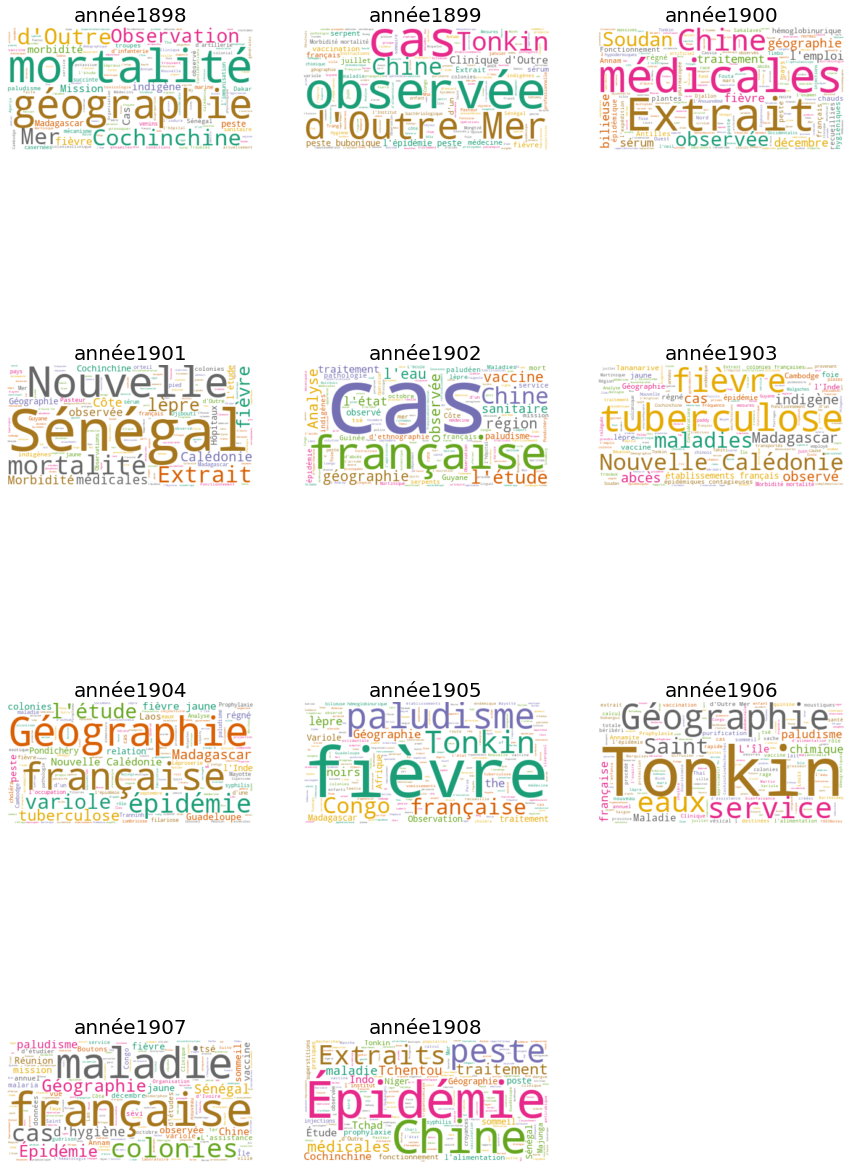

<Figure size 1080x2160 with 0 Axes>

In [37]:
annees = list(range(1898,1908))
# Create subplots for each comedian

n=0
for index in (dfAHMC_par_annee.index):
    plt.rcParams['figure.figsize'] = [15, 30]
    wc.generate(dfAHMC_par_annee["articles_annee"][index])
    ax = plt.subplot(5,3, n+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("année" + str(index), fontsize=20)
    n+=1
plt.show()
plt.savefig('./Notebook_data/Training_Doccano/WordCloudAHMC.png')

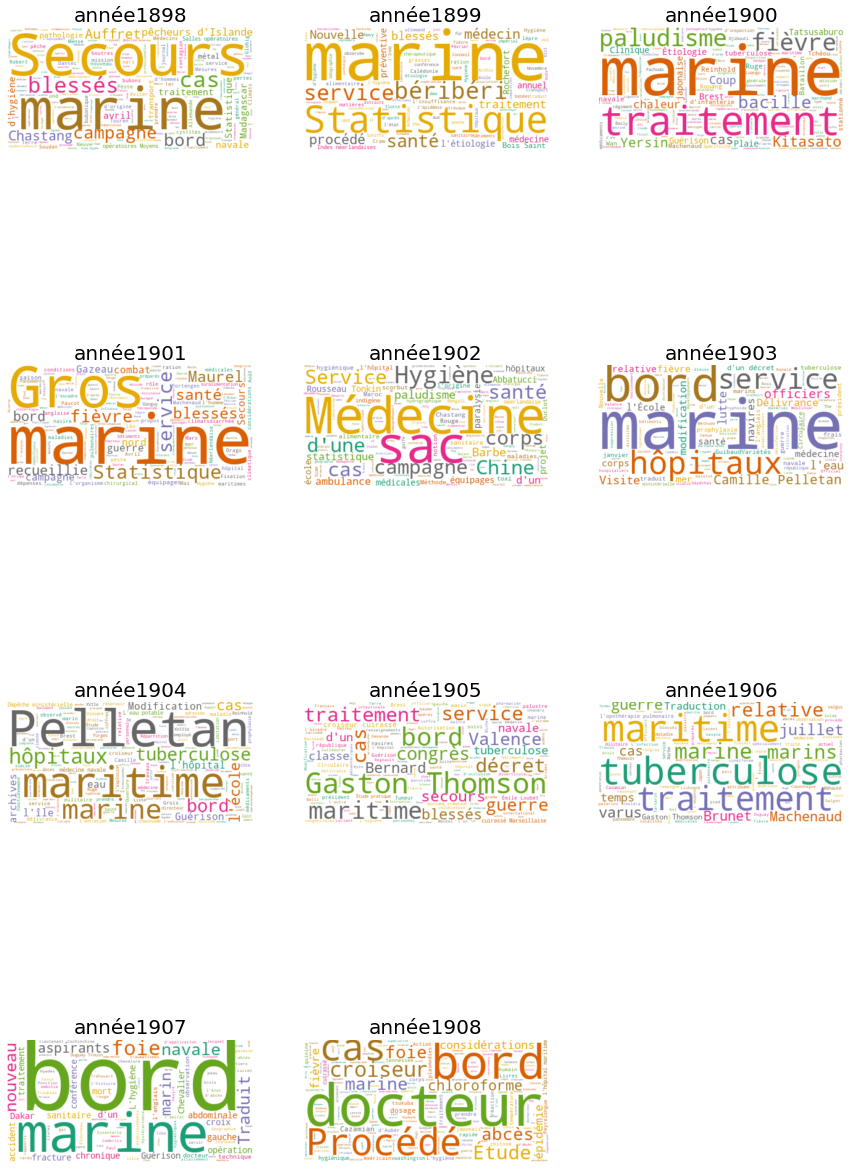

In [22]:
n=0
for index in (dfAMN_par_annee.index):
    plt.rcParams['figure.figsize'] = [15, 30]
    wc.generate(dfAMN_par_annee["articles_annee"][index])
    ax = plt.subplot(5,3, n+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("année" + str(index), fontsize=20)
    n+=1
plt.show()
plt.savefig('./Notebook_data/Training_Doccano/WordCloudMarine.png')

In [29]:
df_ensemble = pd.concat([dfAMN_par_annee,dfAHMC_par_annee],axis=1)

In [30]:
ens=[]
# df_lesdeux["ensemble"] = df_lesdeux[["articles_annee"]] + df_lesdeux["articles_annee"]

In [31]:
for i in range (len(df_ensemble)):
    concat = df_ensemble.iloc[i,0]+df_ensemble.iloc[i,1]
    ens.append(concat)
df_ensemble["ensemble"]=ens

In [33]:
df_ensemble=df_ensemble.drop(columns=["articles_annee"])

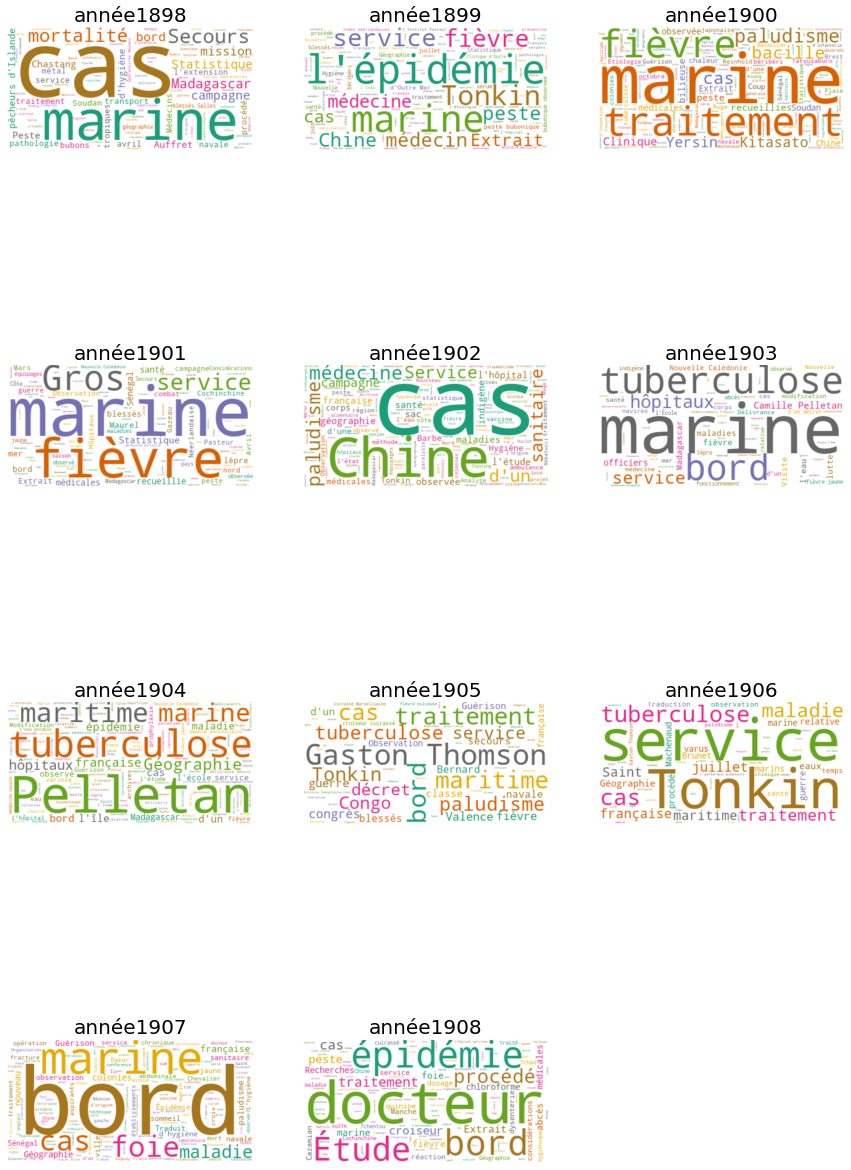

<Figure size 1080x2160 with 0 Axes>

In [38]:
n=0
for index in (df_ensemble.index):
    plt.rcParams['figure.figsize'] = [15, 30]
    wc.generate(df_ensemble["ensemble"][index])
    ax = plt.subplot(5,3, n+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("année" + str(index), fontsize=20)
    n+=1
plt.show()
plt.savefig('./Notebook_data/Training_Doccano/WordCloudEnsemble.png')